# DiscreteDP Example: Asset Replacement

** Kosumi Mao **

*Department of Economics, University of Tokyo*

From Miranda and Fackler, Applied Computational Economics and Finance, 2002, Section 7.6.2

`Julia` translation of the [Python version](http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/ddp_ex_MF_7_6_2_py.ipynb)

In [1]:
using QuantEcon

In [2]:
maxage = 5    # Maximum asset age
repcost = 75  # Replacement cost
beta = 0.9    # Discount factor
m = 2         # Number of actions; 1: keep, 2: replace;

In [3]:
S = [i for i in 1:maxage]
n = length(S);

In [4]:
# Reward array
R = Array{Float64}(n,m)
for i in 1:n
R[i, 1] = 50 - 2.5 * S[i] - 2.5 * S[i]^2
R[i, 2] = 50 - repcost
end

# Infeasible action
R[n,1] = -Inf;

In [5]:
R

5×2 Array{Float64,2}:
   45.0  -25.0
   35.0  -25.0
   20.0  -25.0
    0.0  -25.0
 -Inf    -25.0

In [6]:
# (Degenerate) transition probability array
Q = zeros(n,m,n)
for i in 1:n
    Q[i, 1, min(i+1, n)] = 1
    Q[i, 2, 1] = 1
end

In [7]:
Q

5×2×5 Array{Float64,3}:
[:, :, 1] =
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

[:, :, 2] =
 1.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 3] =
 0.0  0.0
 1.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 4] =
 0.0  0.0
 0.0  0.0
 1.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 5] =
 0.0  0.0
 0.0  0.0
 0.0  0.0
 1.0  0.0
 1.0  0.0

In [8]:
# Create a DiscreteDP
ddp = DiscreteDP(R, Q, beta);

In [9]:
# Solve the dynamic optimization problem (by policy iteration)
res = solve(ddp, PFI);

In [10]:
# Number of iterations
res.num_iter

1

In [11]:
# Optimal value function
res.v

5-element Array{Float64,1}:
 216.56 
 190.622
 172.914
 169.904
 169.904

In [12]:
# Optimal policy
res.sigma

5-element Array{Int64,1}:
 1
 1
 1
 2
 2

In [13]:
# Transition probability matrix
res.mc.p

5×5 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [14]:
# Simulate the controlled Markov chain
initial_state_value = 1
nyrs = 12
spath = simulate(res.mc, nyrs+1, init=initial_state_value);

In [15]:
using PyPlot

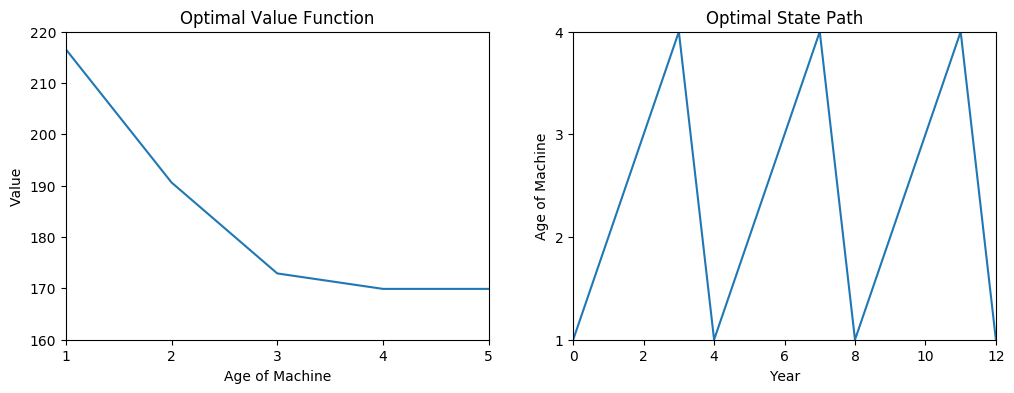

PyObject <matplotlib.text.Text object at 0x0000000043AB9780>

In [16]:
import PyPlot.plt
fig, axes = plt[:subplots](1, 2, figsize=(12, 4))
axes[1][:plot]( [i for i in 1:n], res.v)
axes[1][:set_xlim](1, 5)
axes[1][:set_ylim](160, 220)
axes[1][:set_xticks](linspace(1, 5, 5))
axes[1][:set_xlabel]("Age of Machine")
axes[1][:set_ylabel]("Value")
axes[1][:set_title]("Optimal Value Function")

axes[2][:plot](spath)
axes[2][:set_xlim](0, nyrs)
axes[2][:set_ylim](1, 4)
axes[2][:set_yticks](linspace(1, 4, 4))
axes[2][:set_xlabel]("Year")
axes[2][:set_ylabel]("Age of Machine")
axes[2][:set_title]("Optimal State Path")